# Prieskumná analýza dát

### Róbert Móro, Jakub Ševcech

IAU, 10.10.2018

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w03

## Pýtať sa môžete na http://slido.com#iau2019-w03

# Spätná väzba z minulých prednášok

Čo je to Docker? https://www.docker.com/resources/what-container

Online kurzy na štatistiku

- https://www.coursera.org/learn/statistical-inference
- https://www.coursera.org/specializations/statistics-with-python
- https://www.coursera.org/specializations/statistics
- stay tuned na 5. prednášku

V akom softvéri z bežného života sa používa, čo sa učíme na IAU?

## Dnes sa budeme venovať tomu, ako...

- načítať dáta

- analyzovať jednotlivé atribúty

- analyzovať vzťahy medzi atribútmi

- vizualizovať dáta (*vhodné typy vizualizácií, vlastnosti dobrých vizualizácií, ako neklamať vizualizáciou*)

**...ako spoznať dáta**

## Predtým, ako začneme analyzovať dáta, by sme si mali ujasniť...

Aké otázky máme analýzou zodpovedať

Akú úlohu máme riešiť

### Na tomto predmete sa budeme zaoberať len dvomi úlohami

Klasifikácia

Regresia

### V oboch prípadoch sa snažíme nájsť funkciu $f$ atribútov $X$, ktorá bude predikovať hodnotu závislej premennej $Y$

V prípade regresie $Y \in R$

V prípade klasifikácie $Y \in \{C_1, C_2,\dots, C_N\}$

Obe úlohy sú príkladom **učenia s učiteľom**

### Vieme, akú úlohu ideme riešiť

### Máme vyjasnené počiatočné otázky, ktoré by sme chceli zodpovedať

<img src="img/I-got-all-the-data-I-have-the-best-data.jpg" alt="I got all the data, I have the best data!" style="width: 1000px; margin-left: auto; margin-right: auto;"/>

Skúsme ich načítať...

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

,1990-01-01 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


Vidíme, že pri načítaní nastalo viacero problémov - všetky dáta skončili v jednom stĺpci a navyše prvý riadok bol automaticky interpretovaný ako hlavička.

## Skúsme sa teda pozrieť na dáta v nejakom editore (postačí aj konzola) predtým, ako ich načítame

In [3]:
%%bash
head data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0
1990-01-02	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	48.000	1	-999.000	0	-999.000	0	48.000	1	50.000	1	55.000	1	59.000	1	58.000	1	59.000	1	58.000	1	57.000	1	58.000	1	54.000	1	49.000	1	48.000	1
1990-01-03	51.000	1	50.000	1	47.000	1	48.000	1	51.000	1	52.000	1	58.000	1	57.000	1	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	69.000	1	74.000	1	-999.000	0	-999.000	0	103.000	1	84.000	1	75.000	1	-999.000	0	-999.000	0	-999.000	0
1990-01-04	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	67.000	1	57.000	1	57.000	1	-999.000	0	71.000	1	74.000	1	70.000	1	70.000	1	69.000	1	65.000	1	64

## Teraz už vieme načítať dáta lepšie

In [4]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


## Lessons learned

Už pred načítaním dát by sme sa mali sami seba spýtať:

* Odkiaľ sú dané dáta? Kto ich vytvoril?
* V akom formáte sú reprezentované?
* Koľko ich je?
* Je niekde dostupná interpretácia jednotlivých stĺpcov?

## Môžeme sa pustiť do prieskumnej analýzy! Chceme...

Opísať dáta spolu s ich charakteristikami = **Deskriptívna štatistika**

Formulovať a overiť hypotézy o dátach = **Vizualizácia dát** + inferenčná štatistika

Identifikovať vzťahy medzi atribútmi = **Závislosti** (napr. korelácie)

Identifikovať problémy v dátach = Čo budeme musieť riešiť v rámci predspracovania

### Možné problémy v dátach

* nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
* duplicitné záznamy, resp. nejednoznačné mapovanie medzi záznamami
* nejednotné formáty dát
* chýbajúce hodnoty
* vychýlené (odľahlé) hodnoty (angl. *outliers*)
* a ďalšie

## Iris dataset

iris = kosatec

Tri druhy: setosa, virginica, versicolor

<img src="img/iris_setosa.jpg" alt="Iris setosa" style="width: 200px; float: left; margin-right: 20px;"/>
<img src="img/iris_virginica.jpg" alt="Iris virginica" style="width: 200px; float: left; margin-right: 20px;"/>
<img src="img/iris_versicolor.jpg" alt="Iris versicolor" style="width: 200px; float: left; margin-right: 20px;"/>

In [5]:
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
iris.shape[0] - iris.dropna().shape[0]

0

In [7]:
iris[iris.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [8]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Typy atribútov

* Spojité (numerické)
* Diskrétne (kategorické) - nominálne vs. ordinálne

**Pozor na kategorické atribúty, ktoré sú reprezentované číselne, t. j. čísla len kódujú kategóriu**

### Analýza atribútov po jednom (univariate)

* **spojité** - deskriptívna štatistika (priemer, medián, ...), rozdelenia
* **kategorické** - počet unikátnych hodnôt, frekvencia ich výskytov

### Párová analýza (bivariate)

* **spojitý-spojitý** - závislosť, korelácia
* **spojitý-kategorický** - rozdiely v hodnote spojitého atribútu v závislosti od kategórie
* **kategorický-kategorický** - tabuľka, pomer početnosti hodnôt

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.describe(exclude=np.number)

,species
count,150
unique,3
top,virginica
freq,50


## Analýza po jednom: Spojité atribúty

Chceme zobraziť, aký je tvar rozdelenia dát, či sa zoskupujú okolo nejakého **centra**, a aká je **rozptýlenosť** hodnôt

### Zobrazenie centrálnosti

* **priemer** (mean)
* **medián** (median, stredná hodnota): hodnota, ktorá rozdeľuje vyššie a nižšie hodnoty
* **modus** (mode, modálna hodnota, najpravdepodobnejšia hodnota): najčastejsia hodnota (hodnota s najväčšou pravdepodobnosťou výskytu)

In [11]:
x = np.array([1000, 1000, 1200, 1100, 10000])
x.mean()

2860.0

In [12]:
np.median(x)

1100.0

In [13]:
stats.mode(x)

ModeResult(mode=array([1000]), count=array([2]))

### Rozptýlenosť (1/2)

* **variancia** (variance): priemerná kvadratická odchýlka od priemeru 
$$ E[(X-E[X])^2] $$

* **smerodajná odchýlka** (standard deviation): druhá odmocnina variancie, je v jednotkách meranej premennej
$$ s = \sqrt{\frac{1}{N-1}\sum_{i=1}^N{(x_i-\overline{x})^2}} $$ 

### Rozptýlenosť (2/2)

* **rozsah** (range): max - min
* **horný/dolný kvartil** (quartile): hodnota, od ktorej je 25%, resp. 75% hodnôt menších 
* **percentil** (percentile): hodnota, od ktorej je XX% hodnôt menších
* **medzikvartilové rozpätie** (inter quartile range): rozdiel medzi 25% a 75% kvartilom, menej náchylné na outlierov ako rozsah

### Na vizualizáciu spojitých premenných používame dva základe typy grafov

* Krabicový graf (boxplot)
* Histogram (graf hustoty)

## Boxplot

<img src="img/outlier_box_plot.gif" alt="Boxplot explained" style="width: 500px; margin-right: auto; margin-left: auto;"/>
   
(zdroj obrázku: https://taps-graph-review.wikispaces.com/Box+and+Whisker+Plots)  

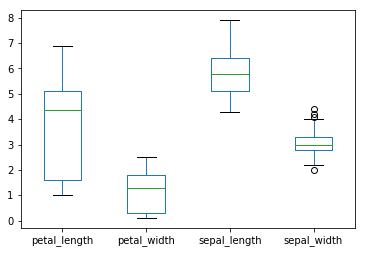

In [14]:
iris[iris.columns.difference(['species'])].plot.box()

## Histogram

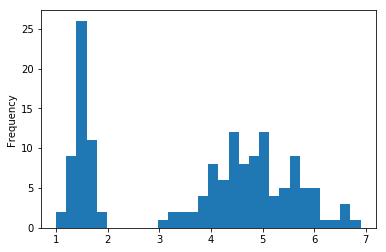

In [15]:
iris.petal_length.plot.hist(bins=30)

## Graf hustoty pravdepodobnostného rozdelenia

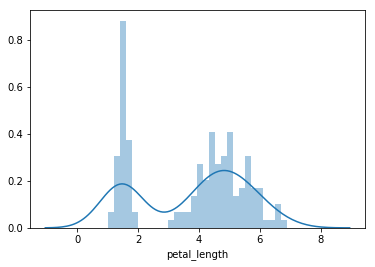

In [16]:
sns.distplot(iris.petal_length, bins=30)

## Koeficienty asymetrie a špicatosti

### Koeficient asymetrie (skewness)

Koeficient asymetrie je metrika toho, ako je rozdelenie asymetrické. Úplne symetrické rozdelenie má hodnotu koeficientu rovnú 0. V podstate to porovnáva relatívnu veľkosť dvoch chvostov rozdelenia.
Rozdelenie naklonené doľava bude mať hodnotu koeficientu väčšiu ako 0, naklonené doprava bude mať menej ako 0.

<img src="img/skewness.png" alt="Skewness explained" style="width: 1000px;"/>

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Skewness -0.00668')

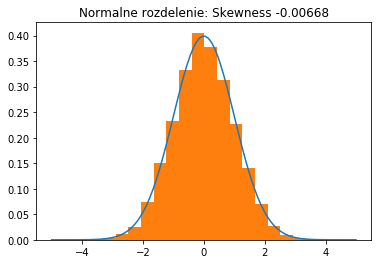

In [17]:
sample_size = 10000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Chi-kvadrat(5) rozdelenie: Skewness 1.19267')

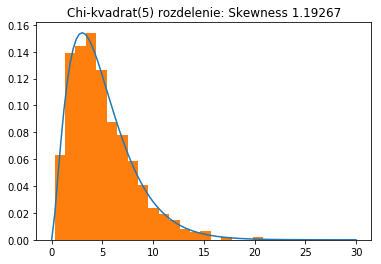

In [18]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample)))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'30 - Chi-kvadrat(5) rozdelenie: Skewness -1.35403')

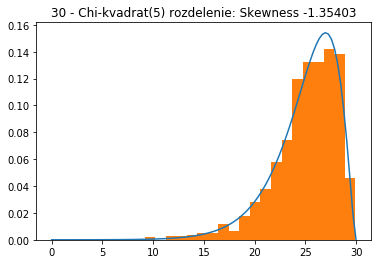

In [19]:
sample_size = 1000

chi2 = stats.chi2(5)
x = np.linspace(0, 30, 100)
sample = 30 - chi2.rvs(sample_size)

plt.plot(x, chi2.pdf(30 - x))
plt.hist(sample, normed=True, bins=20)
plt.title("30 - Chi-kvadrat(5) rozdelenie: ""Skewness %.5f" % (stats.skew(sample), ))

### Koeficient špicatosti (kurtosis)

Koeficient špicatosti meria množstvo dát sustredené v chvostoch. Vyjadruje teda množstvo, resp. náchylnosť danej distribúcie produkovať odľahlé (od stredu distribúcie vzdialené) hodnoty.

Veľmi často sa porovnáva k hodnote koeficientu normálneho rozdelenia, ktorá je 3. 
Ak je to viac ako 3, viac dát je sustredených na okrajoch. Ak menej ako 3, tak je menej dát v okrajoch.

Často sa používa aj *excess kurtosis*, čo je rozdiel oproti normálnemu rozdeleniu, čize kurtosis - 3.

### Koeficient špicatosti (kurtosis)

![kurtosis](img/kurtosis.png)

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Kurtosis 0.00000')

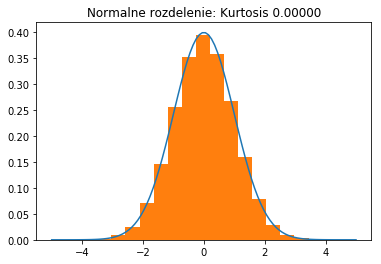

In [20]:
sample_size = 100000

norm = stats.norm(0, 1)
x = np.linspace(-5, 5, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample), ))

V základnom nastavení vracia funkcia excess kurtosis.

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Normalne rozdelenie: Kurtosis 2.98399')

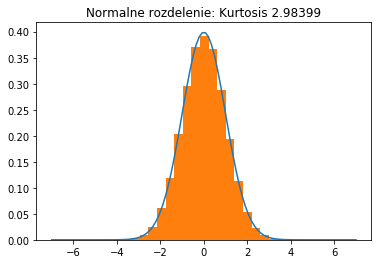

In [21]:
sample_size = 100000

norm = stats.norm(0,1)
x = np.linspace(-7, 7, 100)
sample = norm.rvs(sample_size)

plt.plot(x, norm.pdf(x))
plt.hist(sample, normed=True, bins=20)
plt.title("Normalne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False), ))
# musime prestavit parameter fisher na False

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Logisticke rozdelenie: Kurtosis 4.14697')

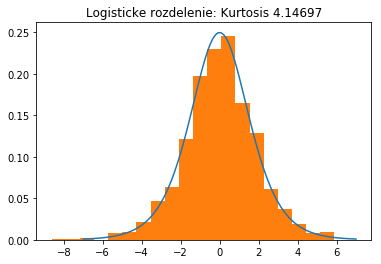

In [22]:
sample_size = 1000

logistic = stats.logistic()
x = np.linspace(-7, 7, 100)
sample = logistic.rvs(sample_size)

plt.plot(x, logistic.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("Logisticke rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False)))

C:\Users\robom\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Uniformne rozdelenie: Kurtosis 1.79400')

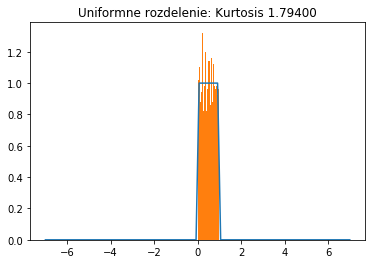

In [23]:
sample_size = 1000

uniform = stats.uniform()
x = np.linspace(-7, 7, 100)
sample = uniform.rvs(sample_size)

plt.plot(x, uniform.pdf(x))
plt.hist(sample, normed=True, bins=20)

plt.title("Uniformne rozdelenie: ""Kurtosis %.5f" % (stats.kurtosis(sample, fisher=False)))

## Analýza po jednom: Kategorické atribúty

Najčastejším spôsobom zobrazenia je frekvenčná tabuľka zobrazujúca buď počty pozorovaní pre jednotlivé unikátne hodnoty atribútu alebo pomer voči celkovému počtu pozorovaní. 

Na grafickú vizualizáciu sa používa **stĺpcový graf (bar plot)**.

In [24]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

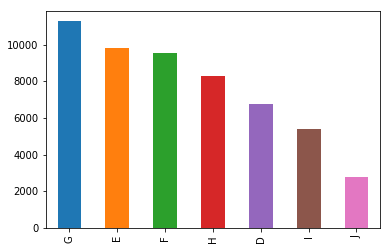

In [26]:
diamonds.color.value_counts().plot(kind='bar')

### Kedy je vhodné použiť stĺpcový, a kedy koláčový graf? Aké sú ich výhody a nevýhody?

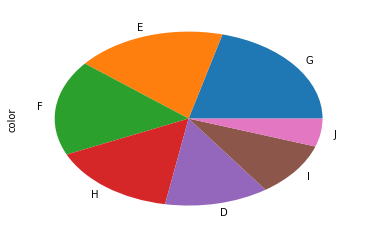

In [27]:
diamonds.color.value_counts().plot(kind='pie')

Pri počte hodnôt väčšom ako 3-4 je lepšie použiť stĺpcový graf.

## Párová analýza

### Spojitý - spojitý: Scatter plot

Najčastejší spôsob ako vizualizovať vzťah dvoch spojitých atribútov.

Zobrazuje rozmiestnenie v priestore hodnôt. Umožňuje zistiť, či sú v dátach nejaké prirodzené zhluky.

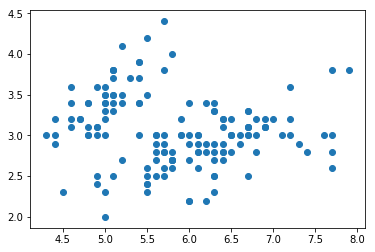

In [28]:
plt.scatter(iris.sepal_length, iris.sepal_width)

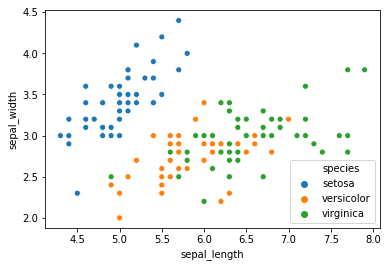

In [29]:
sns.scatterplot(iris.sepal_length, iris.sepal_width, hue=iris.species)

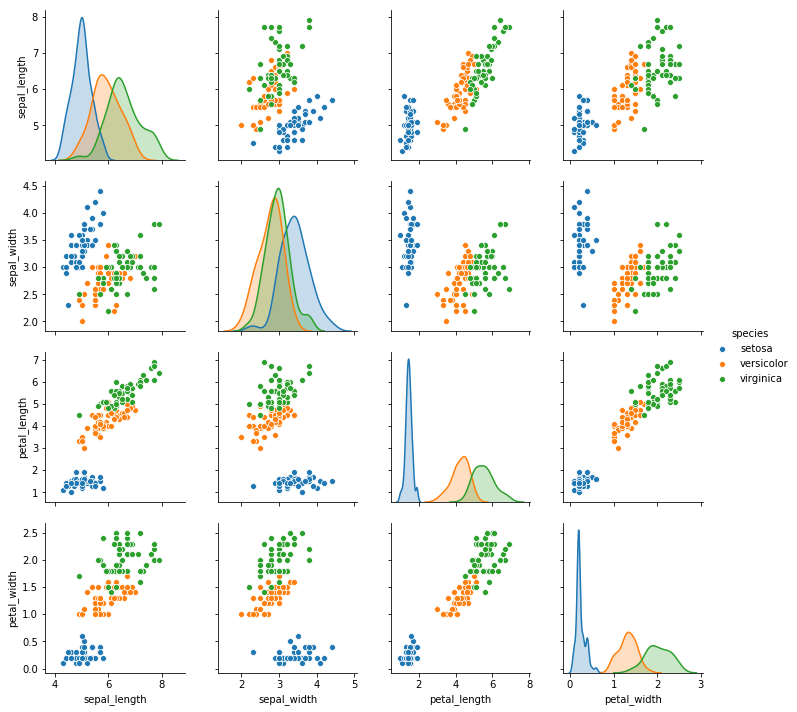

In [30]:
sns.pairplot(iris, hue="species")

## Korelácia

Hodnota v rozsahu [-1, 1], ktorá hovorí o tom, aký silný lineárny vzťah je medzi atribútmi.

* -1 perfektná negatívna korelácia
* 0 žiadna korelácia
* 1 perfektná kladná korelácia

Pearsonov korelačný koeficient:
$$ corr(X, Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y} = \frac{E[(X-E[X])(Y-E[Y])]}{\sigma_X\sigma_Y}$$

$$ r_{xy} = \frac{\sum_{i=1}^{n}{(x_i-\overline{x})(y_i-\overline{y})}}{(n-1)s_xs_y} $$

![scatter plot correlation](img/scatter-continuous-continuous.png)

Zdroj obrázku: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one

Pearsonov korelačný koeficient meria **lineárnu závislosť** medzi dvomi premennými.

Medzi dvomi premennými však môže byť aj iný typ závislosti.

Alternatívy k Pearsonovmu korelačnému koeficientu, ktoré nevyžadujú linearitu, len monotónnosť, sú:
* Spearmanov koeficient
* Kendalovo $\tau$

Pearson correlation: 0.963


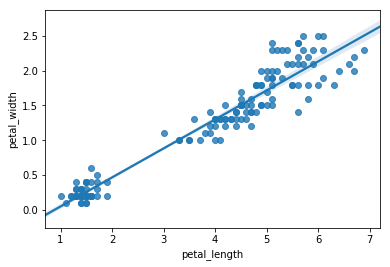

In [31]:
sns.regplot(x="petal_length", y="petal_width", data=iris)
print("Pearson correlation: %.3f" % iris.petal_length.corr(iris.petal_width))

In [32]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


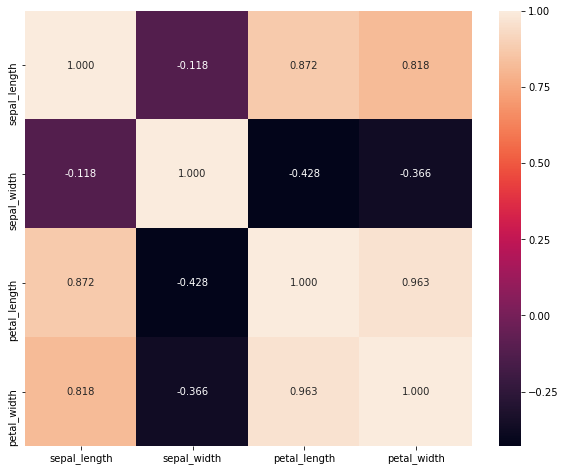

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(iris.corr(), ax=ax, annot=True, fmt=".3f")

## Korelácia $\neq$ kauzalita

Ak dva javy spolu korelujú, môže to byť náhoda. (*Príklady vtipných korelácií nájdete tu:* http://tylervigen.com/spurious-correlations)

Alebo môže existovať nejaký iný jav, ktorý je pôvodcom oboch. (*Napr. účasť študentov na prednáškach môže korelovať s ich finálnym hodnotením na predmete, ale možno len na prednášky chodí viac snaživejších študentov, ktorí by lepšie hodnotenie mali tak či tak.*)

Dokázať kauzalitu je netriviálne - kontrolovaný (randomizovaný) experiment

<img src="img/xkcd_correlation.png" alt="Correlation is not causation" style="width: 800px; margin-right: auto; margin-left: auto;"/>

(Zdroj: https://xkcd.com/552/)

## Vždy použite aj scatterplot na kontrolu miery korelácie

In [34]:
df = sns.load_dataset("anscombe")

In [35]:
df.groupby('dataset').agg(['mean'])

,x,y
,mean,mean
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [36]:
df.groupby('dataset').corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

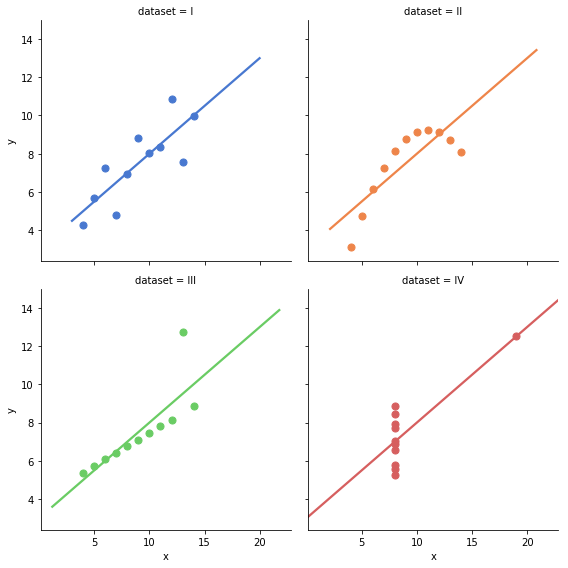

In [37]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

### Čo dokáže jeden outlier

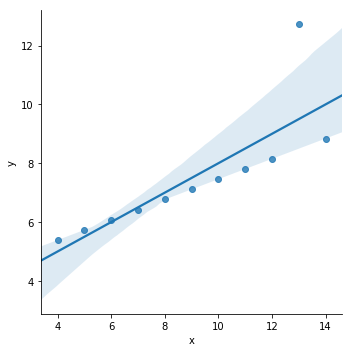

In [38]:
d3 = df.loc[df.dataset == 'III', ['x', 'y']]
sns.lmplot(x='x', y='y', data=d3)

### Čo dokáže jeden outlier

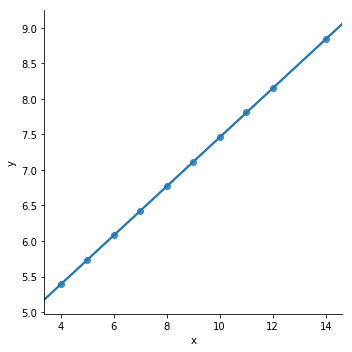

In [39]:
d3_no = d3.drop(24)
sns.lmplot(x='x', y='y', data=d3_no)

## Párová analýza: Spojitý - kategorický

Tu sa najčastejšie používa rozdeľovanie pozorovaní podľa kategorickej hodnoty a zobrazovanie rozdelení podmnožín numerických hodnôt napríklad pomocou histogramov alebo boxplotov.

Čize ide o viacnásobné použitie vizualizácií, ktoré sa použivajú na zobrazenie spojitých atribútov.

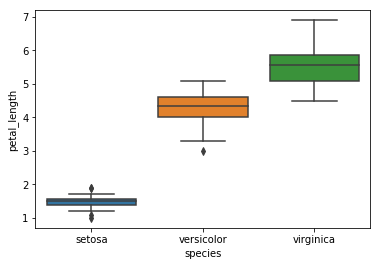

In [40]:
sns.boxplot('species', 'petal_length', data=iris)

## Párová analýza: Kategorický - kategorický

* Kontingenčná tabuľka
* Teplotná mapa
* Zložený stĺpcový graf
* Chi-kvadrát testy

In [41]:
titanic = pd.read_csv('data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Frekvencna tabulka
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [43]:
survived_class = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"])
survived_class.index= ["died","survived"]
survived_class

Pclass,1,2,3
died,80,97,372
survived,136,87,119


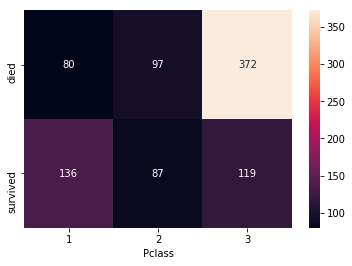

In [44]:
sns.heatmap(survived_class, annot=True, fmt="d")

Pclass,1,2,3
died,0.37037,0.527174,0.757637
survived,0.62963,0.472826,0.242363


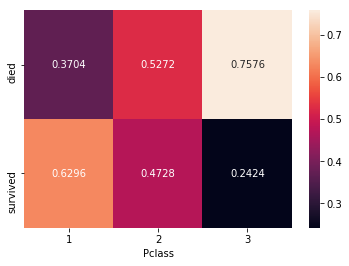

In [45]:
survived_class_perc = pd.crosstab(index=titanic["Survived"], 
                           columns=titanic["Pclass"],
                            normalize='columns') #'index', 'all'
survived_class_perc.index= ["died","survived"]

sns.heatmap(survived_class_perc, annot=True, fmt=".4f")
survived_class_perc

In [46]:
pd.crosstab(index=titanic["Survived"], 
            columns=[titanic["Pclass"], titanic["Sex"]],
            margins=True)

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

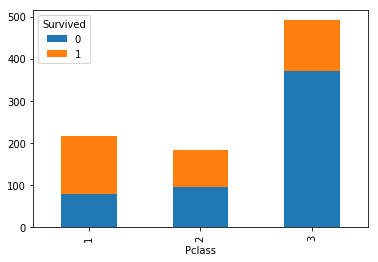

In [47]:
pd.crosstab(index=titanic["Pclass"], columns=titanic["Survived"]).plot.bar(stacked=True)

## Vizualizácie nám pomáhajú pochopiť dáta

Ak sú spravené dobre...

## Pravidlá dobrých informačných vizualizácií podľa E. Tufteho (podľa Skiena, kap. 6)

Maximalizujte pomer medzi dátami a atramentom

Minimalizujte faktor klamania

Minimalizujte "*chartjunk*"

Používajte vhodné škály a označenia osí

## Pravidlá dobrých informačných vizualizácií podľa E. Tufteho (podľa Skiena, kap. 6)

Používajte farby efektívne


Vhodne využite opakovanie

## Príklady zavádzania vizualizáciami (Skiena, kap. 6.2.2)

Prezentovanie priemeru bez variancie

Prezentovanie interpolácie bez dát

Skreslenie škály osí

## Príklady zavádzania vizualizáciami (Skiena, kap. 6.2.2)

Neuvedenie čísel na osiach

Skrytie alebo skreslenie nulového bodu na osi 

<img src="img/axis_manipulation.png" alt="Problem s osou y" style="width: 600px; margin-right: auto; margin-left: auto;"/>

(Zdroj obrázku: https://cs.wikipedia.org/wiki/Sloupcov%C3%BD_graf)

<img src="img/obamacareenrollment-fncchart.jpg" alt="Obamacare na FOX News" style="width: 1000px; margin-right: auto; margin-left: auto;"/>

(Zdroj obrázku: https://www.mediamatters.org/msnbc/msnbc-criticizes-fox-news-airing-dishonest-obamacare-enrollment-chart)

<img src="img/kazimir_graf.jpg" alt="Ako (ne)klesli ceny plynu" style="width: 1000px; margin-right: auto; margin-left: auto;"/>

Príklady toho, ako sa dá zavádzať grafmi a štatistikami nájdete napr. v knihe "*A Field Guide to Lies and Statistics*" od D. Levitina.

Príklady praktických úskalí vizualizácií nájdete tu: https://anaconda.org/jbednar/plotting_pitfalls/notebook

## Ďalšie užitočné zdroje

Steven S. Skiena: The Data Science Design Manual. Springer International Publishing, kap. 6.

Allen B. Downey: Think Stats: Exploratory Data Analysis in Python (2nd ed.). O'Reilly Media, 2014, kap. 1, 2, 7.

Jake VanderPlas: Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media, 2016, kap. 4.

Edward R. Tufte: The Visual Display of Quantitative Information. Graphics Press, Cheshire, CT, 1983.

# Čo si z dneška odniesť

**Spoznajte vaše dáta!** Dátový vedec musí byť zvedavý (a zdravo podozrievavý).

*Robiť strojové učenie bez znalosti dát je ako utekať so zaviazanými očami*

Pri prieskumnej analýze nám pomáhajú vizualizácie

Ale musíme ich vedieť používať korektne

# Zadanie projektu...

## Spätnú väzbu nám môžete nechať tu: https://tinyurl.com/iau2019-w03